In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
#Error can be ignored, does not affect the data

/Users/colegauerkemacbook/anaconda3/lib/python3.11/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [4]:
plt.style.use("ggplot")

In [5]:
ticker = ['AMZN','CVX', 'GOOGL','BA','WMT']
stocks = yf.download(ticker,start='2019-01-01',end='2024-01-01')

[*********************100%%**********************]  5 of 5 completed


In [6]:
stocks.to_csv("stock_data.csv")
stocks = pd.read_csv("stock_data.csv",header=[0,1],index_col=[0],parse_dates=[0])

In [8]:
close_data = stocks.loc[:,"Close"].copy()

<Axes: xlabel='Date'>

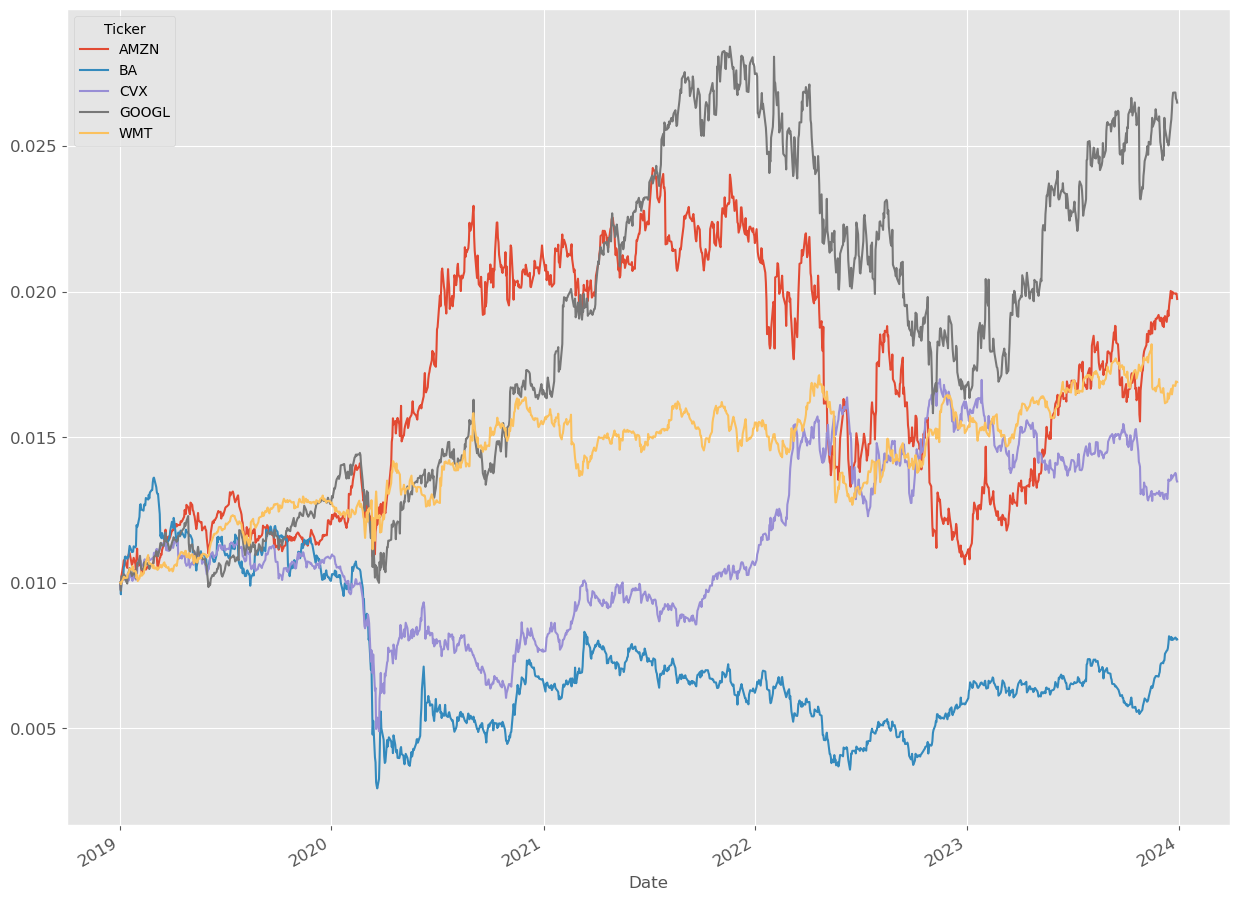

In [9]:
norm_close_data = close_data.div(close_data.iloc[0]*(100))
norm_close_data.plot(figsize=(15,12),fontsize=12)

In [10]:
returns = norm_close_data.pct_change().dropna()
summary = returns.describe().T.loc[:,['mean','std']]
summary["mean"]=summary["mean"]*252
summary["std"]=summary['std']*np.sqrt(252)

Text(0.5, 1.0, 'Risk Return')

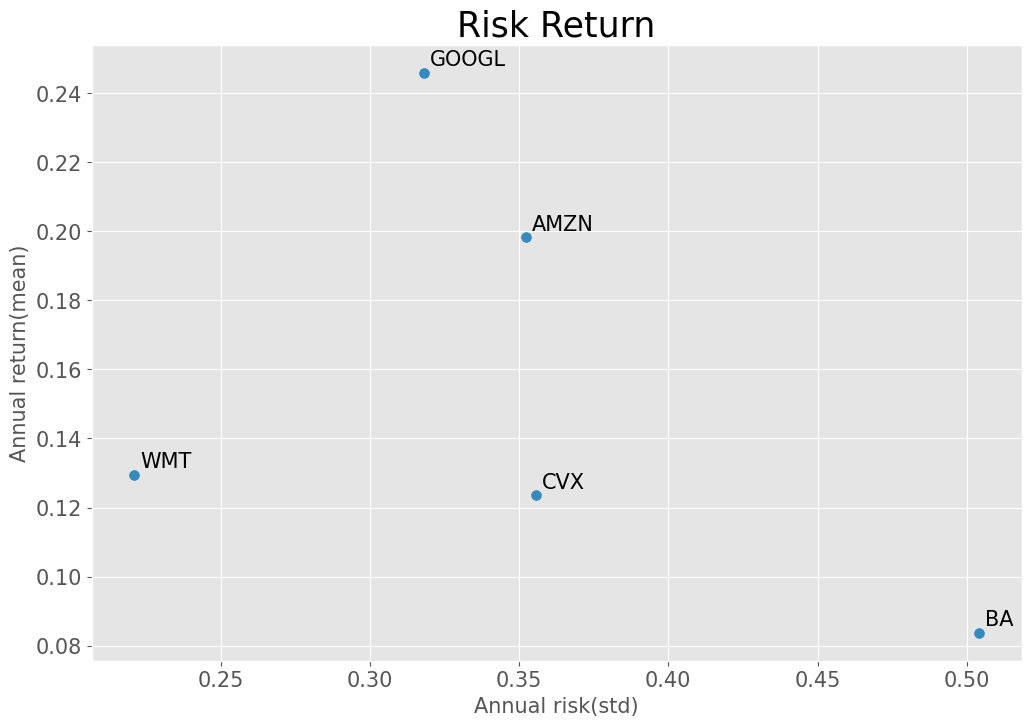

In [13]:
summary.plot(kind="scatter",x="std",y="mean",figsize=(12,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.xlabel("Annual risk(std)",fontsize=15)
plt.ylabel("Annual return(mean)",fontsize=15)
plt.title('Risk Return', fontsize=25)
